In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel(r'C:\Users\abrahamp\OneDrive - Hewlett Packard Enterprise\Documents\Personal Stuff\Class Notes\Data Science Course\Python for Data Science\Cars.xlsx')

In [4]:
df.head(2)

,Make,Model,Type,Origin,DriveTrain,Doors,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,NaN,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,2DR,23820,21761,2.0,4.0,200,24,31,2778,101,172


In [4]:
df.shape

(428, 16)

In [5]:
df.tail(2)

,Make,Model,Type,Origin,DriveTrain,Doors,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
426,Volvo,V40,Wagon,Europe,Front,NaN,26135,24641,1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,NaN,35145,33112,2.5,5.0,208,20,27,3823,109,186


In [6]:
df.sample()

,Make,Model,Type,Origin,DriveTrain,Doors,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
298,Mitsubishi,Lancer Sportback LS,Wagon,Asia,Front,NaN,17495,16295,2.4,4.0,160,25,31,3020,102,181


In [7]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
Doors           object
MSRP             int64
Invoice          int64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [8]:
print(df.isna().sum())
print(df.isnull().sum().sum())

Make             0
Model            0
Type             0
Origin           0
DriveTrain       0
Doors          137
MSRP             0
Invoice          0
EngineSize       0
Cylinders        2
Horsepower       0
MPG_City         0
MPG_Highway      0
Weight           0
Wheelbase        0
Length           0
dtype: int64
139


# MEAN

In [11]:
df['Weight'].mean()

3577.9532710280373

In [12]:
df['Weight'].sum()/ df['Weight'].count()

3577.9532710280373

In [13]:
make = df.groupby('Type').aggregate({'Weight':'mean'})
make

,Weight
Type,
Hybrid,2490.666667
SUV,4444.433333
Sedan,3399.064885
Sports,3295.693878
Truck,4250.750000
Wagon,3438.800000


# MEDIAN

In [14]:
df.groupby('Type').aggregate({'MSRP':'median'})

,MSRP
Type,
Hybrid,20140.0
SUV,32062.5
Sedan,26432.5
Sports,40590.0
Truck,22180.0
Wagon,25545.0


In [15]:
df.groupby('Type').agg({'MSRP': 'median'}).sort_values(by='MSRP', ascending=False).style.format({'MSRP': '{:,.0f}'})

,MSRP
Type,
Sports,"40,590"
SUV,"32,062"
Sedan,"26,432"
Wagon,"25,545"
Truck,"22,180"
Hybrid,"20,140"


In [18]:
df.groupby('Origin').agg({'MSRP': 'median'}).sort_values(by='MSRP', ascending=False).style.format({'MSRP': '{:,.0f}'})

,MSRP
Origin,
Europe,"40,590"
USA,"25,520"
Asia,"23,032"


In [65]:
df.groupby('Origin').agg({'MSRP': 'mean'}).sort_values(by='MSRP', ascending=False).style.format({'MSRP': '{:,.0f}'})

,MSRP
Origin,
Europe,"48,350"
USA,"28,377"
Asia,"24,741"


In [19]:
df.groupby('Make').agg({'MSRP': 'median'}).sort_values(by='MSRP', ascending=False).style.format({'MSRP': '{:,.0f}'})

,MSRP
Make,
Porsche,"76,765"
Jaguar,"66,058"
Mercedes-Benz,"51,395"
Hummer,"49,995"
Cadillac,"49,275"
Lincoln,"42,915"
Lexus,"41,010"
Audi,"40,590"
Saab,"39,465"


# MODE

In [21]:
df.groupby('Type').aggregate({'Cylinders':'count'})

,Cylinders
Type,
Hybrid,3
SUV,60
Sedan,262
Sports,47
Truck,24
Wagon,30


In [22]:
df['Cylinders'].value_counts()

Cylinders
6.0     190
4.0     136
8.0      87
5.0       7
12.0      3
10.0      2
3.0       1
Name: count, dtype: int64

In [23]:
import statistics
statistics.mode(df['Cylinders'])

6.0

# ----------- MEASURES OF SPREAD ----------

# STANDARD DEVIATION

In [25]:
df['MPG_City'].std()

5.238217638649044

In [26]:
df.groupby('Type').aggregate({'MPG_City':'std'})

,MPG_City
Type,
Hybrid,7.810250
SUV,2.820626
Sedan,4.234574
Sports,2.668632
Truck,3.230291
Wagon,4.212870


In [32]:
df.groupby('Type').agg({'MPG_City': ['mean', 'std']})

MPG_City          
             mean       std
Type                       
Hybrid  55.000000  7.810250
SUV     16.100000  2.820626
Sedan   21.083969  4.234574
Sports  18.408163  2.668632
Truck   16.500000  3.230291
Wagon   21.100000  4.212870

In [33]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'Doors', 'MSRP',
       'Invoice', 'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City',
       'MPG_Highway', 'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [34]:
df.groupby('Type').agg({'MPG_Highway': ['mean', 'std']})

MPG_Highway          
              mean       std
Type                        
Hybrid   56.000000  8.660254
SUV      20.500000  3.337004
Sedan    28.629771  4.467459
Sports   25.489796  2.902028
Truck    21.000000  3.878592
Wagon    27.900000  4.412756

In [35]:
df.groupby('Type').agg({'Weight': ['mean', 'std']})

Weight            
               mean         std
Type                           
Hybrid  2490.666667  560.429597
SUV     4444.433333  889.252616
Sedan   3399.064885  579.003993
Sports  3295.693878  478.131049
Truck   4250.750000  886.827479
Wagon   3438.800000  581.451715

In [61]:
df.groupby('Type').agg({'MSRP': ['mean', 'std', 'count']})

MSRP                    
                mean           std count
Type                                    
Hybrid  19920.000000    725.465368     3
SUV     34790.250000  13598.630413    60
Sedan   29773.618321  15584.591701   262
Sports  53387.061224  33779.633235    49
Truck   24941.375000   9871.969328    24
Wagon   28840.533333  11834.002794    30

# MAX - MIN - RANGE

In [5]:
mmax = df['MSRP'].max()
mmin = df['MSRP'].min()
mran = df['MSRP'].max() - df['MSRP'].min()

In [6]:
mmax

192465

In [7]:
range = pd.DataFrame({
    'max_MSRP': [df['MSRP'].max()],
    'min_MSRP': [df['MSRP'].min()],
    'range_MSRP': [df['MSRP'].max() - df['MSRP'].min()]
})
range

,max_MSRP,min_MSRP,range_MSRP
0,192465,10280,182185


In [70]:
max = df.groupby('Type').agg({'MSRP': 'max'})
min = df.groupby('Type').agg({'MSRP': 'min'})
range = max - min
mmr = pd.concat([max, min, range], axis=1)
mmr.columns = ['max_price', 'min_price', 'range_price']
mmr.sort_values(by='max_price', ascending=False)

,max_price,min_price,range_price
Type,,,
Sports,192465,18345,174120
Sedan,128420,10280,118140
SUV,76870,17163,59707
Wagon,60670,11905,48765
Truck,52975,12800,40175
Hybrid,20510,19110,1400


# QUARTILES

In [71]:
df['MSRP'].quantile(0.25)

20334.25

In [73]:
df['MSRP'].median()

27635.0

In [74]:
df['MSRP'].quantile(0.75)

39205.0

In [77]:
miqr = df['MSRP'].quantile(0.75) - df['MSRP'].quantile(0.25)
mlow = df['MSRP'].quantile(0.25) - (1.5 * (df['MSRP'].quantile(0.75) - df['MSRP'].quantile(0.25)))
mup = df['MSRP'].quantile(0.75) + (1.5 * (df['MSRP'].quantile(0.75) - df['MSRP'].quantile(0.25)))
print(miqr)
print(mlow)
print(mup)

18870.75
-7971.875
67511.125


In [81]:
df.groupby('Type').agg({
    'MSRP': [
        'min',
        lambda x: x.quantile(0.25),
        'median',
        lambda x: x.quantile(0.75),
        'max'
    ]
})

MSRP                                       
          min <lambda_0>   median <lambda_1>     max
Type                                                
Hybrid  19110   19625.00  20140.0    20325.0   20510
SUV     17163   23403.00  32062.5    41790.0   76870
Sedan   10280   19318.75  26432.5    35935.0  128420
Sports  18345   29380.00  40590.0    76200.0  192465
Truck   12800   18477.50  22180.0    27318.0   52975
Wagon   11905   19615.00  25545.0    35082.5   60670

In [83]:
df.groupby('Type').agg({
    'MSRP': [
        'min',
        ('Q1', lambda x: x.quantile(0.25)),
        'median',
        ('Q3', lambda x: x.quantile(0.75)),
        'max'
    ]
})

MSRP                                    
          min        Q1   median       Q3     max
Type                                             
Hybrid  19110  19625.00  20140.0  20325.0   20510
SUV     17163  23403.00  32062.5  41790.0   76870
Sedan   10280  19318.75  26432.5  35935.0  128420
Sports  18345  29380.00  40590.0  76200.0  192465
Truck   12800  18477.50  22180.0  27318.0   52975
Wagon   11905  19615.00  25545.0  35082.5   60670

# Co-Efficient of Variation

In [87]:
df.groupby('Type').agg({'MSRP': ['std', 'mean', ('Co Eff Var', lambda x: (x.std() / x.mean())*100)]})

MSRP                         
                 std          mean Co Eff Var
Type                                         
Hybrid    725.465368  19920.000000   3.641894
SUV     13598.630413  34790.250000  39.087475
Sedan   15584.591701  29773.618321  52.343627
Sports  33779.633235  53387.061224  63.273071
Truck    9871.969328  24941.375000  39.580694
Wagon   11834.002794  28840.533333  41.032538

In [88]:
df.groupby('Type').agg({'MPG_City': ['std', 'mean', ('Co Eff Var', lambda x: (x.std() / x.mean())*100)]})

MPG_City                      
             std       mean Co Eff Var
Type                                  
Hybrid  7.810250  55.000000  14.200454
SUV     2.820626  16.100000  17.519417
Sedan   4.234574  21.083969  20.084331
Sports  2.668632  18.408163  14.497005
Truck   3.230291  16.500000  19.577524
Wagon   4.212870  21.100000  19.966210

In [89]:
df.groupby('Type').agg({'MPG_Highway': ['std', 'mean', ('Co Eff Var', lambda x: (x.std() / x.mean())*100)]})

MPG_Highway                      
               std       mean Co Eff Var
Type                                    
Hybrid    8.660254  56.000000  15.464739
SUV       3.337004  20.500000  16.278066
Sedan     4.467459  28.629771  15.604243
Sports    2.902028  25.489796  11.385059
Truck     3.878592  21.000000  18.469487
Wagon     4.412756  27.900000  15.816329

# SKEWNESS & KURTOSIS

In [90]:
df['MSRP'].skew()

2.7980992746701707

In [91]:
df['MSRP'].kurtosis()

13.879205524289228

In [94]:
df.groupby('Type').agg({'MSRP': ['skew']})

,MSRP
,skew
Type,
Hybrid,-1.239145
SUV,1.034736
Sedan,2.071161
Sports,1.858229
Truck,1.302794
Wagon,0.852972


In [95]:
df.groupby('Type').agg({'MPG_Highway': ['skew']})

,MPG_Highway
,skew
Type,
Hybrid,1.732051
SUV,-0.092010
Sedan,0.868112
Sports,0.133526
Truck,1.053521
Wagon,0.172176


In [97]:
df.groupby('Type').agg({'MPG_City': ['skew']})

,MPG_City
,skew
Type,
Hybrid,-1.700162
SUV,0.213397
Sedan,1.295706
Sports,0.315533
Truck,1.270642
Wagon,0.687101


# AGGREGATE ALL THE FORMULAS/ CODE IN FULL

# Calculate all measures for MSRP

In [24]:
mct = df['MSRP'].count()
msum = df['MSRP'].sum()
mmean = df['MSRP'].mean()
msd = df['MSRP'].std()
mmin = df['MSRP'].min()
mq1 = df['MSRP'].quantile(0.25)
mmid = df['MSRP'].median()
mq3 = df['MSRP'].quantile(0.75)
mmax = df['MSRP'].max()
mran = df['MSRP'].max() - df['MSRP'].min()
miqr = df['MSRP'].quantile(0.75) - df['MSRP'].quantile(0.25)
mlow = df['MSRP'].quantile(0.25) - (1.5 * (df['MSRP'].quantile(0.75) - df['MSRP'].quantile(0.25)))
mup = df['MSRP'].quantile(0.75) + (1.5 * (df['MSRP'].quantile(0.75) - df['MSRP'].quantile(0.25)))
mvar = df['MSRP'].var()
mcoff = df['MSRP'].std() / df['MSRP'].mean() * 100
mskew = df['MSRP'].skew()
mkurt = df['MSRP'].kurtosis()

# Calculate all measures for Weight

In [25]:
wct = df['Weight'].count()
wsum = df['Weight'].sum()
wmean = df['Weight'].mean()
wsd = df['Weight'].std()
wmin = df['Weight'].min()
wq1 = df['Weight'].quantile(0.25)
wmid = df['Weight'].median()
wq3 = df['Weight'].quantile(0.75)
wmax = df['Weight'].max()
wran = df['Weight'].max() - df['Weight'].min()
wiqr = df['Weight'].quantile(0.75) - df['Weight'].quantile(0.25)
wlow = df['Weight'].quantile(0.25) - (1.5 * (df['Weight'].quantile(0.75) - df['Weight'].quantile(0.25)))
wup = df['Weight'].quantile(0.75) + (1.5 * (df['Weight'].quantile(0.75) - df['Weight'].quantile(0.25)))
wvar = df['Weight'].var()
wcoff = df['Weight'].std() / df['Weight'].mean() * 100
wskew = df['Weight'].skew()
wkurt = df['Weight'].kurtosis()

In [33]:
print(mct)
print(msum)
print(mmean)
print(msd)
print(mmin)
print(mq1)
print(mmid)
print(mq3)
print(mmax)
print(mran)
print(miqr)
print(mlow)
print(mup)
print(mvar)
print(mcoff)
print(mskew)
print(mkurt)

428
14027638
32774.85514018692
19431.716673717518
10280
20334.25
27635.0
39205.0
192465
182185
18870.75
-7971.875
67511.125
377591612.88763136
59.28848988226739
2.7980992746701707
13.879205524289228


In [34]:
print(wct)
print(wsum)
print(wmean)
print(wsd)
print(wmin)
print(wq1)
print(wmid)
print(wq3)
print(wmax)
print(wran)
print(wiqr)
print(wlow)
print(wup)
print(wvar)
print(wcoff)
print(wskew)
print(wkurt)

428
1531364
3577.9532710280373
758.9832146098709
1850
3104.0
3474.5
3977.75
7190
5340
873.75
1793.375
5288.375
576055.5200595333
21.212776051482518
0.8918242317694193
1.68878852562616


In [35]:
Metric = ["ct","sum","mean","sd","min","q1","mid","q3","max","ran","iqr","low","up","var","coff","skew","kurt"]
MSRP = [428,14027638,32774.85514018692,19431.716673717518,10280,20334.25,27635.0,39205.0,192465,182185,18870.75,-7971.875,67511.125,377591612.88763136,59.28848988226739,2.7980992746701707,13.879205524289228]
Weight = [428,1531364,3577.9532710280373,758.9832146098709,1850,3104.0,3474.5,3977.75,7190,5340,873.75,1793.375,5288.375,576055.5200595333,21.212776051482518,0.8918242317694193,1.68878852562616]
data = pd.DataFrame([Metric, MSRP, Weight]) # Each list would be added as a row
data = data.transpose() # To Transpose and make each rows as columns
data.columns = ['Metric', 'MSRP', 'Weight'] # Rename the columns
data

,Metric,MSRP,Weight
0,ct,428,428
1,sum,14027638,1531364
2,mean,32774.85514,3577.953271
3,sd,19431.716674,758.983215
4,min,10280,1850
5,q1,20334.25,3104.0
6,mid,27635.0,3474.5
7,q3,39205.0,3977.75
8,max,192465,7190
9,ran,182185,5340


# PLOTTING A GRAPH TO IDENTIFY SKEWNESS

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\abrahamp\AppData\Local\Temp\ipykernel_11868\2434166486.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MSRP'], kde=True, bins=7)


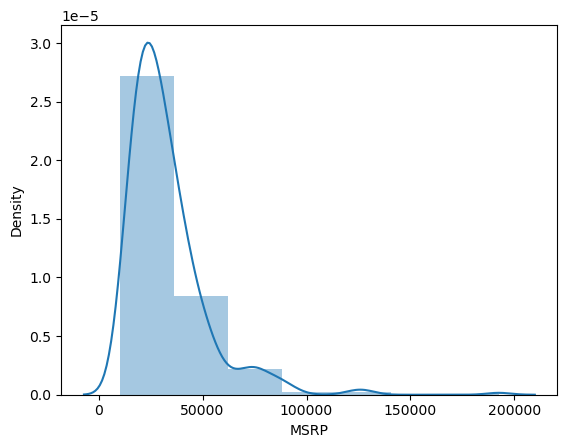

In [9]:
sns.distplot(df['MSRP'], kde=True, bins=7)
plt.show()

C:\Users\abrahamp\AppData\Local\Temp\ipykernel_11868\3731610503.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'], kde=True, bins=7)


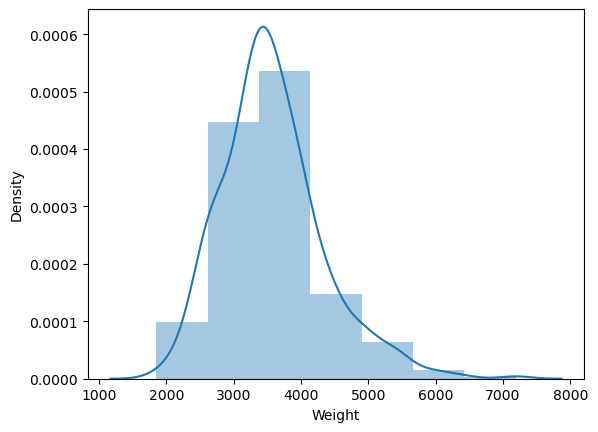

In [10]:
sns.distplot(df['Weight'], kde=True, bins=7)
plt.show()

C:\Users\abrahamp\AppData\Local\Temp\ipykernel_11868\2189824012.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MPG_City'], kde=True, bins=9)


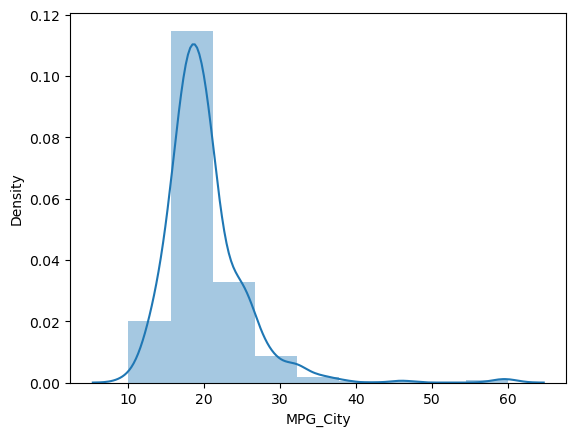

In [11]:
sns.distplot(df['MPG_City'], kde=True, bins=9)
plt.show()

# Analysis/ Observations for this project